In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

district(鄉鎮市區)、rps01(交易標的)、rps02(土地區段位置或建物區門牌)、rps03(土地移轉總面積平方公尺)、rps04(都市土地使用分區)、rps05(非都市土地使用分區)、rps06(非都市土地使用編定)、rps07(交易年月)、rps08(交易筆棟數)、rps09(移轉層次)、rps10(總樓層數)、rps11(建物型態)、rps12(主要用途)、rps13(主要建材)、rps14(建築完成年月)、rps15(建物移轉總面積平方公尺)、rps16(建物現況格局-房)、rps17(建物現況格局-廳)、rps18(建物現況格局-衛)、rps19(建物現況格局-隔間)、rps20(有無管理組織)、rps21(總價元)、rps22(單價每平方公尺)、rps23(車位類別)、rps24(車位移轉總面積平方公尺)、rps25(車位總價元)、rps26(備註)、rps27(編號

In [114]:
df=pd.read_csv("https://quality.data.gov.tw/dq_download_csv.php?nid=26820&md5_url=1bf11f76a5c0de2d54c8d42afd8e8599")

In [116]:
data=df[["district","rps01","rps03","rps20","rps16","rps17",'rps18',"rps24","rps14","rps22"]]

In [117]:
data=data[data.rps01!="土地"]

In [118]:
data.dropna(inplace=True)

In [119]:
data.index=range(0,len(data))

In [120]:
data.columns=['鄉鎮市區','交易標的','土地移轉總面積','有無管理組織','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','有無車位','屋齡','每平方公尺單價']

In [121]:
for i in range(0,len(data)):
    if data["有無管理組織"][i]=="無":
        data.有無管理組織[i]=0
    else:
        data.有無管理組織[i]=1

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [122]:
data["屋齡"]=data["屋齡"].map(lambda x:int(108-(x//10000)))

In [217]:
data.head()

,鄉鎮市區,交易標的,土地移轉總面積,有無管理組織,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無車位,屋齡,每平方公尺單價
0,板橋區,房地(土地+建物),30.44,0,3,2,2,0.0,31,80578.0
1,板橋區,房地(土地+建物)+車位,22.60,1,3,2,2,1.0,3,190149.0
2,土城區,房地(土地+建物),4.19,1,1,0,1,0.0,26,123161.0
3,板橋區,房地(土地+建物)+車位,41.33,1,0,0,0,1.0,4,179352.0
4,土城區,房地(土地+建物)+車位,28.73,1,4,2,2,1.0,6,68652.0


In [125]:
for i in range(0,len(data)):
    if data.有無車位[i]==0:
        data.有無車位[i]=0
    else:
        data.有無車位[i]=1

/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [127]:
data.head()

,鄉鎮市區,交易標的,土地移轉總面積,有無管理組織,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無車位,屋齡,每平方公尺單價
0,板橋區,房地(土地+建物),30.44,0,3,2,2,0.0,31,80578.0
1,板橋區,房地(土地+建物)+車位,22.60,1,3,2,2,1.0,3,190149.0
2,土城區,房地(土地+建物),4.19,1,1,0,1,0.0,26,123161.0
3,板橋區,房地(土地+建物)+車位,41.33,1,0,0,0,1.0,4,179352.0
4,土城區,房地(土地+建物)+車位,28.73,1,4,2,2,1.0,6,68652.0


In [128]:
data.corr().round(2)

,土地移轉總面積,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無車位,屋齡,每平方公尺單價
土地移轉總面積,1.00,0.35,0.14,0.43,-0.02,0.11,-0.10
建物現況格局-房,0.35,1.00,0.56,0.79,0.03,0.16,-0.13
建物現況格局-廳,0.14,0.56,1.00,0.42,0.12,-0.04,-0.08
建物現況格局-衛,0.43,0.79,0.42,1.00,0.07,0.04,-0.07
有無車位,-0.02,0.03,0.12,0.07,1.00,-0.64,0.01
屋齡,0.11,0.16,-0.04,0.04,-0.64,1.00,-0.13
每平方公尺單價,-0.10,-0.13,-0.08,-0.07,0.01,-0.13,1.00


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
model=LinearRegression()

In [202]:
S=StandardScaler()

In [205]:
y=S.fit_transform(data.每平方公尺單價.values)
y.shape=(3073,1)

In [218]:
x=S.fit_transform(data.iloc[:,2:8].values)

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [220]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
y_predict=model.predict(x_test)

(-2, 2)

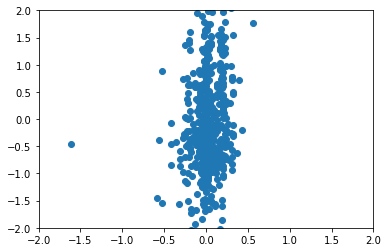

In [224]:
plt.scatter(y_predict,y_test)
plt.xlim([-2,2])
plt.ylim([-2,2])